We're going to plot the descriptive statistics of first pilot subject's performance in terms of changes in accuracy and reaction times across the behavioral session.

In [6]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [140]:
sns.set_style('whitegrid')
sns.set_context('talk')

# Load csv files into pandas

Pilot subject 2 will not be analyzed because something went wrong during csv writing.

In [90]:
# get file paths in data directory
csv_dir = '../behav_data/behav_pilot/'
sub_paths = glob.glob(csv_dir + '*')
sub_paths

['../behav_data/behav_pilot/sub04_block3_behav.csv',
 '../behav_data/behav_pilot/sub04_block5_behav.csv',
 '../behav_data/behav_pilot/sub04_block2_behav.csv',
 '../behav_data/behav_pilot/sub04_allblocks_behav.csv',
 '../behav_data/behav_pilot/sub01_behav.csv',
 '../behav_data/behav_pilot/sub04_block4_behav.csv',
 '../behav_data/behav_pilot/sub04_behav.csv',
 '../behav_data/behav_pilot/sub04_block1_behav.csv',
 '../behav_data/behav_pilot/sub02_behav.csv',
 '../behav_data/behav_pilot/sub03_behav.csv',
 '../behav_data/behav_pilot/sub04_block6_behav.csv']

In [91]:
# exclude unecessary file paths
exclude_strings = ['_block', 'sub02_behav.csv', '_allblocks_']

for exclude_string in exclude_strings:
    for sub in sub_paths:
        if exclude_string in sub:
            sub_paths.remove(sub)
            
sub_paths.pop(0)
sub_paths

['../behav_data/behav_pilot/sub01_behav.csv',
 '../behav_data/behav_pilot/sub04_behav.csv',
 '../behav_data/behav_pilot/sub03_behav.csv']

In [107]:
# load all subjects into one data frame

dfs = []
for sub in sub_paths:
    df = pd.read_csv(sub, index_col=None, header=0)
    dfs.append(df)
    
df = pd.concat(dfs, axis = 0, ignore_index = True)

In [108]:
# manage data types of some columnes
df['sub_id_cat'] = df.SubjectID.astype('category')
df['acc'] = df.accuracy.astype('float')

In [158]:
df.head()

,vision,rotation,file_path,object_id,object_name,set,Geschlecht,SubjectID,Alter,Rechtshaendig,...,distractors,rt,accuracy,clicked_distractor,mouse_pressed,keys,ran,block,sub_id_cat,acc
0,ri_percept,270,./Stimuli/percepts/642_r270_ri_percept.png,642,Tacker,training,weiblich,1,24,True,...,"['Dose', 'Rahmen', 'Tasse', 'Hut', 'Kanne', 'W...",NaN,0,NaN,NaN,[],True,1.0,1,0.0
1,ri_percept,225,./Stimuli/percepts/642_r225_ri_percept.png,642,Tacker,training,weiblich,1,24,True,...,"['Kanne', 'Wuerfel', 'Hut', 'Dose', 'Rahmen', ...",NaN,0,NaN,NaN,[],True,1.0,1,0.0
2,ri_percept,45,./Stimuli/percepts/979_r45_ri_percept.png,979,Hut,training,weiblich,1,24,True,...,"['Tasse', 'Dose', 'Locher', 'Wuerfel', 'Tacker...",NaN,0,NaN,NaN,[],True,1.0,1,0.0
3,ri_percept,180,./Stimuli/percepts/405_r180_ri_percept.png,405,Locher,training,weiblich,1,24,True,...,"['Kanne', 'Rahmen', 'Tasse', 'Wuerfel', 'Hut',...",2.650715,0,Rahmen,True,[],True,1.0,1,0.0
4,ri_percept,225,./Stimuli/percepts/125_r225_ri_percept.png,125,Tasse,training,weiblich,1,24,True,...,"['Dose', 'Wuerfel', 'Rahmen', 'Tacker', 'Hut',...",3.650646,1,NaN,True,[],True,1.0,1,1.0


# Reaction times

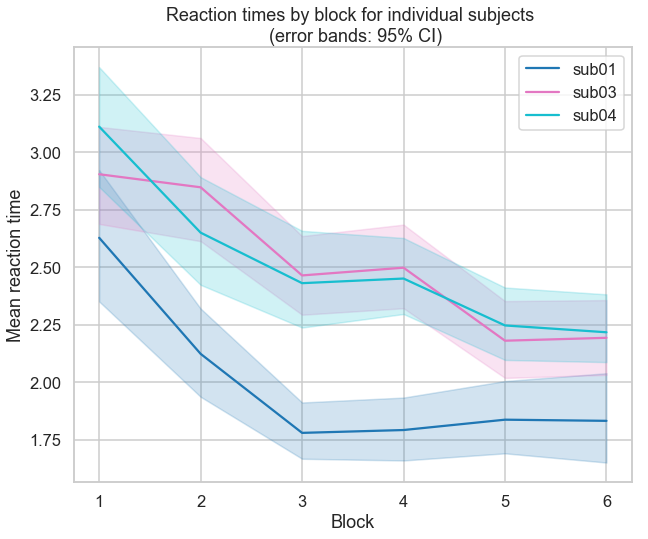

In [180]:
fig, axis = plt.subplots(figsize=(10,8))

sns.lineplot(x="block", y="rt", hue="SubjectID", err_style="band", data=df, ci=95, ax=axis, palette='tab10')
plt.legend(['sub01', 'sub03', 'sub04'])
axis.set(ylabel="Mean reaction time")
axis.set(xlabel="Block")
plt.title('Reaction times by block for individual subjects \n (error bands: 95% CI)')
plt.show()

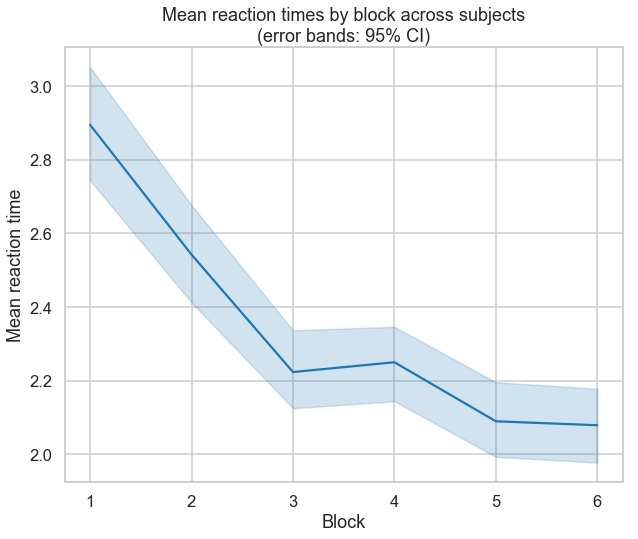

In [181]:
fig, axis = plt.subplots(figsize=(10,8))

sns.lineplot(x="block", y="rt", err_style="band", data=df, ci=95, ax=axis)
plt.title('Mean reaction times by block across subjects\n(error bands: 95% CI)')
axis.set(ylabel="Mean reaction time")
axis.set(xlabel="Block")
plt.show()

# Accuracies

Text(0.5,1,'Accuracies by block for individual subjects\n(error bands: 95% CI)')

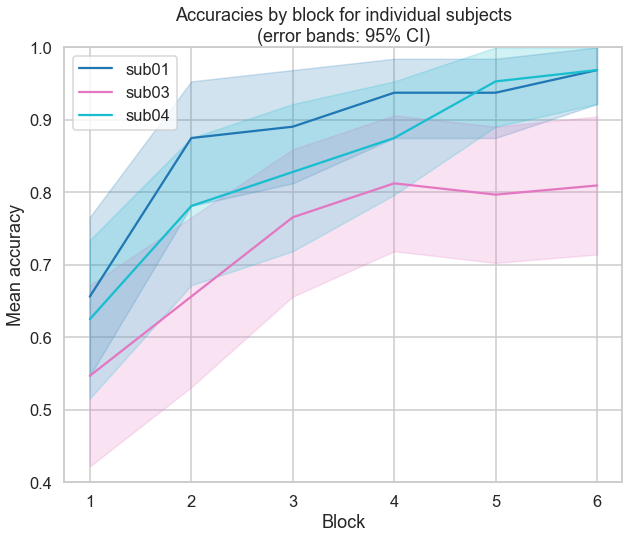

In [189]:
fig, axis = plt.subplots(figsize=(10,8))
sns.lineplot(x="block", y="acc", hue='SubjectID', data=df, palette='tab10', ax=axis)
plt.legend(['sub01', 'sub03', 'sub04'])
axis.set_ylim((.4, 1))
axis.set(ylabel="Mean accuracy")
axis.set(xlabel="Block")
plt.title('Accuracies by block for individual subjects\n(error bands: 95% CI)')

Text(0.5,1,'Accuracies by block across subjects\n(error bands: 95% CI)')

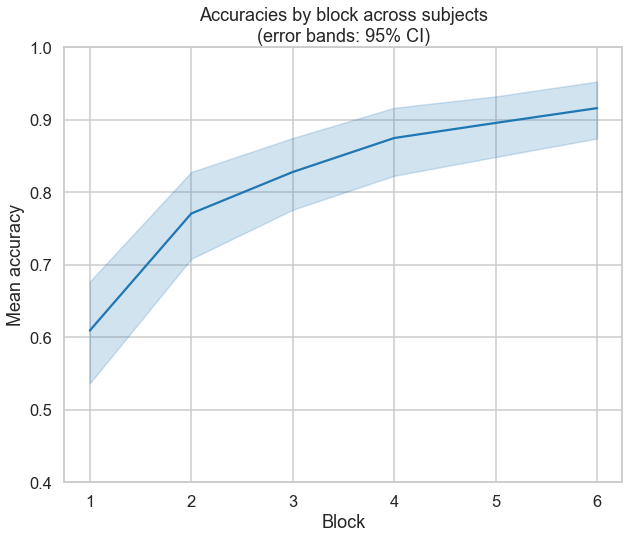

In [188]:
fig, axis = plt.subplots(figsize=(10,8))
sns.lineplot(x="block", y="acc", data=df, ax=axis)
axis.set(ylabel="Mean accuracy")
axis.set_ylim((.4, 1))
axis.set(xlabel="Block")
plt.title('Accuracies by block across subjects\n(error bands: 95% CI)')